## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import plotly.express as px #все три библиотеки для визуализации географических объектов на карте
import folium
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

with ZipFile("drive/MyDrive/Machine Learning projects/Playground Series/Season 3, Episode 20/playground-series-s3e20.zip") as myzip:
    train = myzip.open("train.csv")
    test = myzip.open("test.csv")
    submission = myzip.open("sample_submission.csv")
train = pd.read_csv(train)
test = pd.read_csv(test)
submission = pd.read_csv(submission)

In [ ]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

In [ ]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8

## Разведочный анализ данных

In [ ]:
def info(df):
    print(f'размер датасета: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data_type'])
    summary['missing_counts'] = df.isnull().sum()
    summary['%_missing'] = df.isnull().sum() / df.shape[0] * 100
    summary['number_of_unique'] = df.nunique()
    desc = df.describe(include = 'all').T
    try:
        summary['max'] = desc['max']
        summary['min'] = desc['min']
        summary['std'] = desc['std']
    except:
      print('Все признаки категориальные')

    summary['top'] = desc['top']
    summary['first_value'] = df.loc[0]

    return summary.sort_values(by='%_missing', ascending=False)

In [ ]:
info(train)

размер датасета: (79023, 76)


,data_type,missing_counts,%_missing,number_of_unique,max,min,std,top,first_value
UvAerosolLayerHeight_aerosol_height,float64,78584,99.444466,439,12948.073199,1164.338745,1475.338534,NaN,NaN
UvAerosolLayerHeight_solar_zenith_angle,float64,78584,99.444466,436,40.45266,14.832418,3.7924,NaN,NaN
UvAerosolLayerHeight_solar_azimuth_angle,float64,78584,99.444466,434,-20.66552,-151.315323,42.181747,NaN,NaN
UvAerosolLayerHeight_sensor_azimuth_angle,float64,78584,99.444466,433,80.415855,-105.004929,64.614132,NaN,NaN
UvAerosolLayerHeight_aerosol_pressure,float64,78584,99.444466,439,88296.703125,10920.485315,11501.504673,NaN,NaN
...,...,...,...,...,...,...,...,...,...
latitude,float64,0,0.000000,452,-0.51,-3.299,0.694522,NaN,-0.51
week_no,int64,0,0.000000,53,52.0,0.0,15.297155,NaN,0
year,int64,0,0.000000,3,2021.0,2019.0,0.816502,NaN,2019
longitude,float64,0,0.000000,453,31.532,28.228,0.810375,NaN,29.29


In [ ]:
info(test)

размер датасета: (24353, 75)


,data_type,missing_counts,%_missing,number_of_unique,max,min,std,top,first_value
UvAerosolLayerHeight_aerosol_pressure,float64,22260,91.405576,2093,91284.093317,7801.92334,11941.575783,NaN,NaN
UvAerosolLayerHeight_aerosol_optical_depth,float64,22260,91.405576,2093,6.639144,-0.169583,1.138496,NaN,NaN
UvAerosolLayerHeight_sensor_zenith_angle,float64,22260,91.405576,2083,66.167717,0.044089,15.859504,NaN,NaN
UvAerosolLayerHeight_sensor_azimuth_angle,float64,22260,91.405576,2087,80.370872,-119.807106,78.756559,NaN,NaN
UvAerosolLayerHeight_aerosol_height,float64,22260,91.405576,2092,15102.049805,883.14209,1464.663702,NaN,NaN
...,...,...,...,...,...,...,...,...,...
latitude,float64,0,0.000000,452,-0.51,-3.299,0.694532,NaN,-0.51
week_no,int64,0,0.000000,49,48.0,0.0,14.142426,NaN,0
year,int64,0,0.000000,1,2022.0,2022.0,0.0,NaN,2022
longitude,float64,0,0.000000,453,31.532,28.228,0.810387,NaN,29.29


В тренировочных данных есть колонки, где отстутсвуют примерно 99 процентов записей, взглянем на них подробнее

### Missing values

In [ ]:
missing_train = (train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
print(f'Кол-во признаков, в которых есть пропуски: {missing_train.shape[0]}')
print('----------')
missing_train[:8]

Кол-во признаков, в которых есть пропуски: 70
----------


UvAerosolLayerHeight_aerosol_height           99.444466
UvAerosolLayerHeight_solar_zenith_angle       99.444466
UvAerosolLayerHeight_solar_azimuth_angle      99.444466
UvAerosolLayerHeight_sensor_azimuth_angle     99.444466
UvAerosolLayerHeight_aerosol_pressure         99.444466
UvAerosolLayerHeight_aerosol_optical_depth    99.444466
UvAerosolLayerHeight_sensor_zenith_angle      99.444466
NitrogenDioxide_tropopause_pressure           23.183124
dtype: float64

Пропуски содержатся в специфичных признаках. Если пропуски в таких кол-вах, то самой правильной идеей будет удалить признаки и в тесте и в обучении

In [ ]:
missing_test = (test.isnull().sum() / test.shape[0] * 100).sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
print(f'Кол-во признаков, в которых есть пропуски: {missing_test.shape[0]}')
print('----------')
missing_test[:8]

Кол-во признаков, в которых есть пропуски: 70
----------


UvAerosolLayerHeight_aerosol_pressure         91.405576
UvAerosolLayerHeight_aerosol_optical_depth    91.405576
UvAerosolLayerHeight_sensor_zenith_angle      91.405576
UvAerosolLayerHeight_sensor_azimuth_angle     91.405576
UvAerosolLayerHeight_aerosol_height           91.405576
UvAerosolLayerHeight_solar_zenith_angle       91.405576
UvAerosolLayerHeight_solar_azimuth_angle      91.405576
SulphurDioxide_sensor_zenith_angle            25.220712
dtype: float64

In [ ]:
col_to_drop = ['UvAerosolLayerHeight_aerosol_pressure',
               'UvAerosolLayerHeight_aerosol_optical_depth',
               'UvAerosolLayerHeight_sensor_zenith_angle',
               'UvAerosolLayerHeight_sensor_azimuth_angle',
               'UvAerosolLayerHeight_aerosol_height',
               'UvAerosolLayerHeight_solar_zenith_angle',
               'UvAerosolLayerHeight_solar_azimuth_angle']

In [ ]:
unique_val_df = info(train)['number_of_unique']
unique_val_df.sort_values()

размер датасета: (79023, 76)


year                                             3
week_no                                         53
UvAerosolLayerHeight_sensor_azimuth_angle      433
UvAerosolLayerHeight_sensor_zenith_angle       433
UvAerosolLayerHeight_solar_azimuth_angle       434
                                             ...  
Cloud_solar_zenith_angle                     78539
Cloud_solar_azimuth_angle                    78539
Cloud_sensor_zenith_angle                    78539
Cloud_surface_albedo                         78539
ID_LAT_LON_YEAR_WEEK                         79023
Name: number_of_unique, Length: 76, dtype: int64

Категориальных признаков по сути нет, есть три года, когда была собрана статистика и 53 недели в каждый год

### Широта и долгота

В данных есть географические отметки, откуда были собраны данные со спутников, для начала выведем через ***scatter plot*** их распределение

In [ ]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

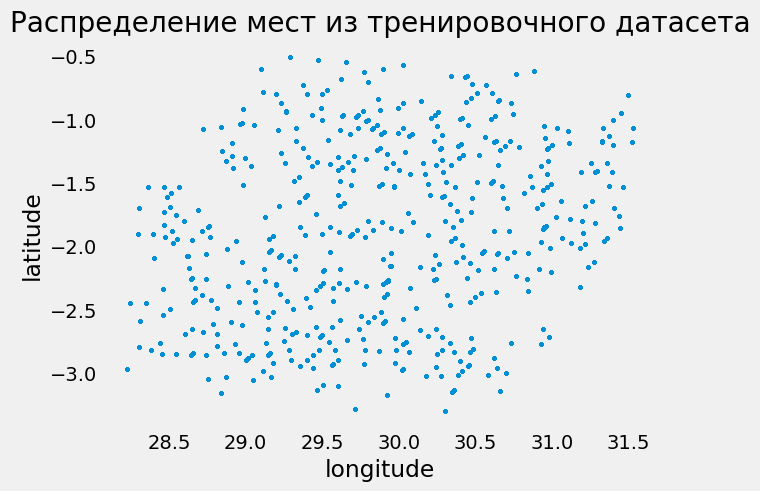

In [ ]:
plt.grid(False)
plt.title('Распределение мест из тренировочного датасета')
plt.scatter(train['longitude'], train['latitude'], s=4) # s - размер точек
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

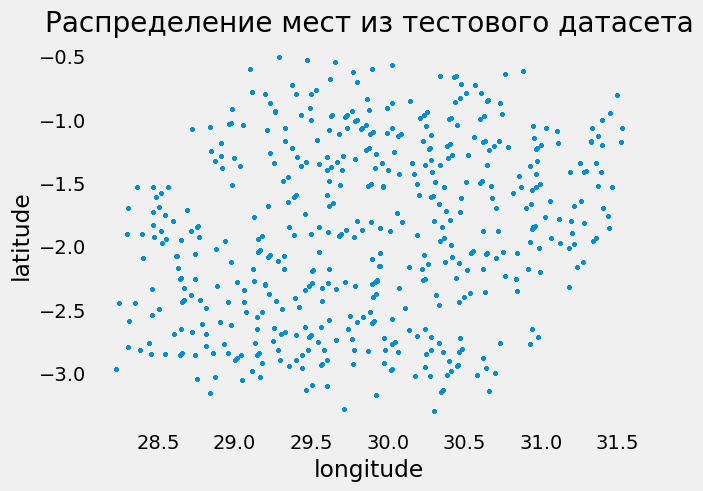

In [ ]:
plt.grid(False)
plt.title('Распределение мест из тестового датасета')
plt.scatter(test['longitude'], test['latitude'], s=4) # s - размер точек
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

Можно утверждать, что данные из теста и трейна из одинаковых мест собраны

#### Geopandas

Для начала удалим дубликаты среди координат, а после преобразуем их в новый формат через библиотеку ***Geopandas*** и сохраним в новых датафреймах. Мы отдельно отобразим точки из трейна и теста в одном графике, чтобы заметить различные местоположения точек (если они есть)

In [ ]:
train_coords = train.drop_duplicates(subset=['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset=['latitude', 'longitude'])

geometry_train = gpd.points_from_xy(train_coords['latitude'], train_coords['longitude'])
geometry_test = gpd.points_from_xy(test_coords['latitude'], test_coords['longitude'])

geo_df_train = gpd.GeoDataFrame(train_coords[['latitude', 'longitude']], geometry=geometry_train)
geo_df_test = gpd.GeoDataFrame(test_coords[['latitude', 'longitude']], geometry=geometry_test)


In [ ]:
geometry_train

<GeometryArray>
[  <POINT (-0.51 29.29)>, <POINT (-0.528 29.472)>, <POINT (-0.547 29.653)>,
 <POINT (-0.569 30.031)>, <POINT (-0.598 29.102)>, <POINT (-0.604 29.896)>,
 <POINT (-0.615 30.885)>, <POINT (-0.627 29.773)>, <POINT (-0.637 30.763)>,
 <POINT (-0.653 30.447)>,
 ...
 <POINT (-3.095 29.505)>, <POINT (-3.099 29.601)>, <POINT (-3.133 29.467)>,
 <POINT (-3.136 30.364)>, <POINT (-3.138 30.662)>, <POINT (-3.153 30.347)>,
 <POINT (-3.161 28.839)>, <POINT (-3.174 29.926)>, <POINT (-3.287 29.713)>,
 <POINT (-3.299 30.301)>]
Length: 497, dtype: geometry

In [ ]:
geo_df_train

,latitude,longitude,geometry
0,-0.510,29.290,POINT (-0.51000 29.29000)
159,-0.528,29.472,POINT (-0.52800 29.47200)
318,-0.547,29.653,POINT (-0.54700 29.65300)
477,-0.569,30.031,POINT (-0.56900 30.03100)
636,-0.598,29.102,POINT (-0.59800 29.10200)
...,...,...,...
78228,-3.153,30.347,POINT (-3.15300 30.34700)
78387,-3.161,28.839,POINT (-3.16100 28.83900)
78546,-3.174,29.926,POINT (-3.17400 29.92600)
78705,-3.287,29.713,POINT (-3.28700 29.71300)


In [ ]:
geo_coord_list_train = [[point.xy[0][0], point.xy[1][0]] for point in geo_df_train.geometry ]
geo_coord_list_test = [[point.xy[0][0], point.xy[1][0]] for point in geo_df_test.geometry ]

In [ ]:
world_map = folium.Map()

In [ ]:
for coord in geo_coord_list_train:
  folium.CircleMarker(location=coord,
                      radius=2,
                      zoom=2).add_to(world_map)

for coord in geo_coord_list_test:
  folium.CircleMarker(location=coord,
                      radius=2,
                      zoom=2,
                      color='red').add_to(world_map)

world_map.fit_bounds(world_map.get_bounds())
world_map

Как видно, данные из теста взяты точно из тех же мест, что данные из обучения

## Feature selection

### Correlation With All Features

Проведем отбор признаков через матрицу корреляций для разных групп признаков

In [4]:
def correlation_view(df, columns:list, title:str):

    f, ax = plt.subplots(figsize=(10,10))

    corr_matrix = df[columns].corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True # Возвращает индексы для верхнего треугольника

    sns.heatmap(corr_matrix, annot=True, mask=mask, ax = ax,  cmap="Blues") # PiYG
    ax.set_title(f'{title}', fontsize=15)

    return

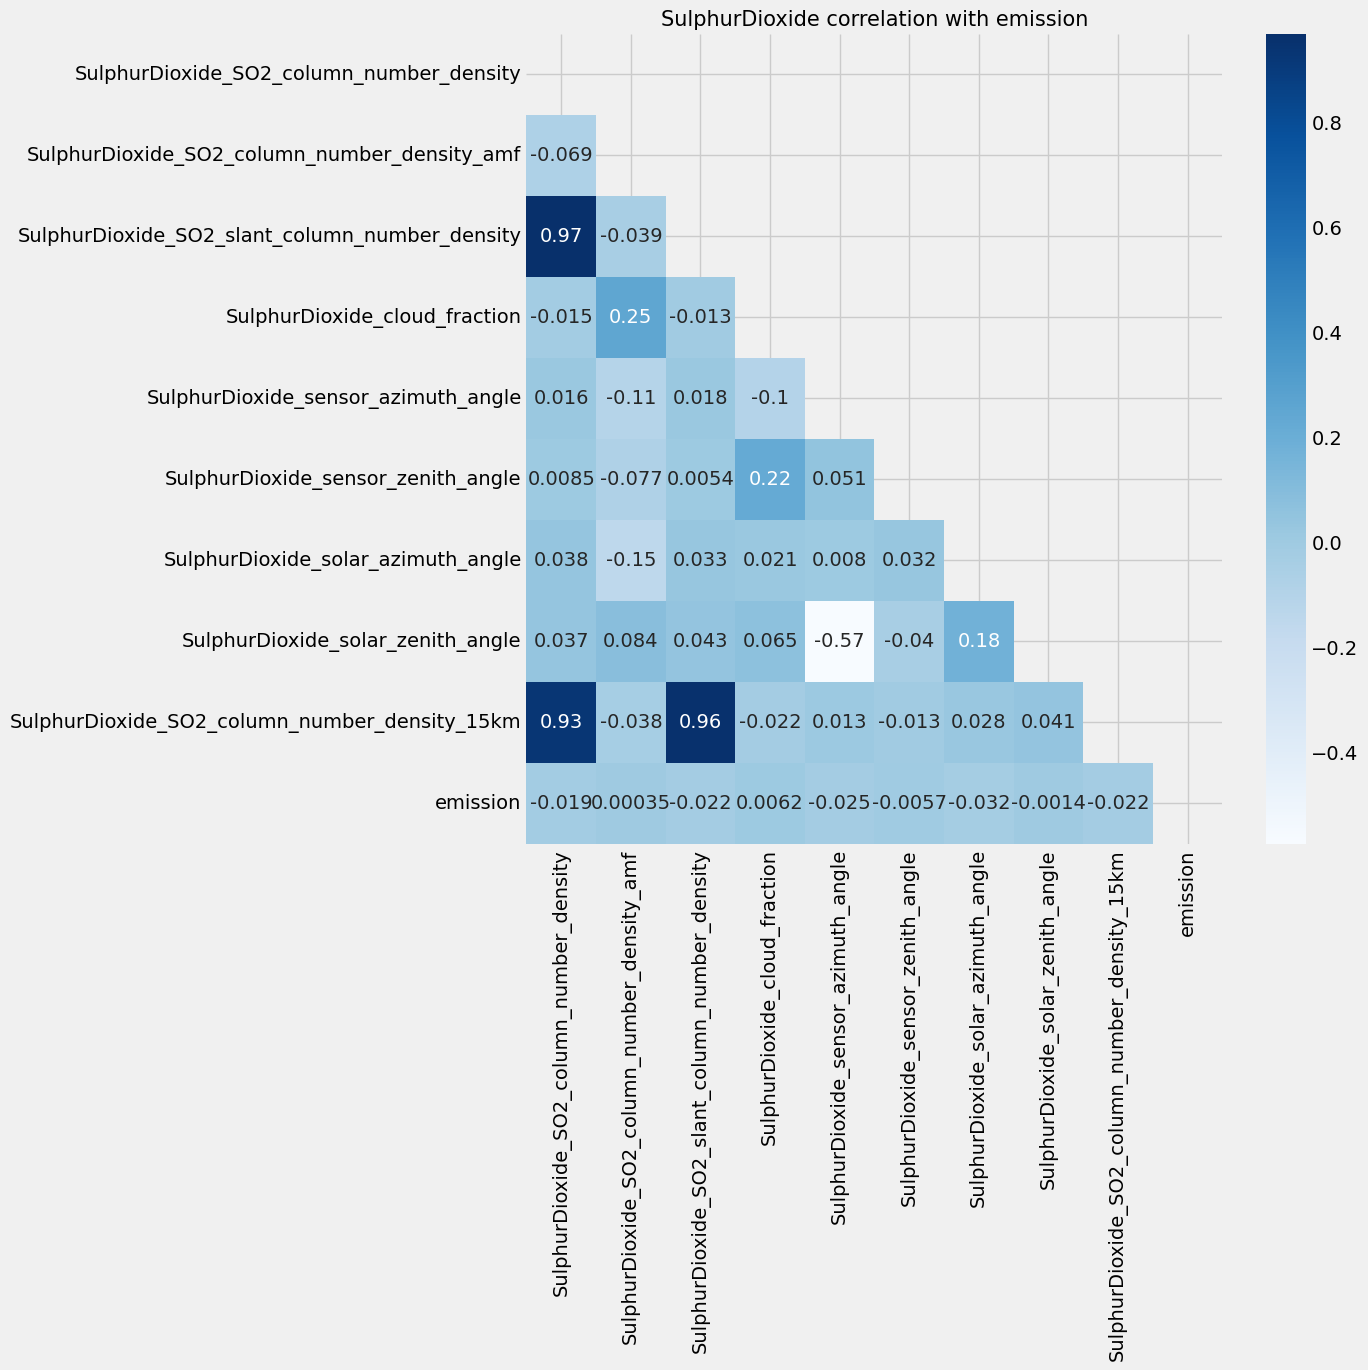

In [5]:
features1 = [ 'SulphurDioxide_SO2_column_number_density',
              'SulphurDioxide_SO2_column_number_density_amf',
              'SulphurDioxide_SO2_slant_column_number_density',
              'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
              'SulphurDioxide_sensor_zenith_angle',
              'SulphurDioxide_solar_azimuth_angle',
              'SulphurDioxide_solar_zenith_angle',
              'SulphurDioxide_SO2_column_number_density_15km',
              'emission']

correlation_view(train, features1, title='SulphurDioxide correlation with emission')

Есть сильные линейные связи между признаками, но с таргетом (***emission***) почти нет никакой связи. Эти признаки можно будет удалить, они не влияют на целевую метку

In [6]:
features1 = [col for col in features1 if col != 'emission']

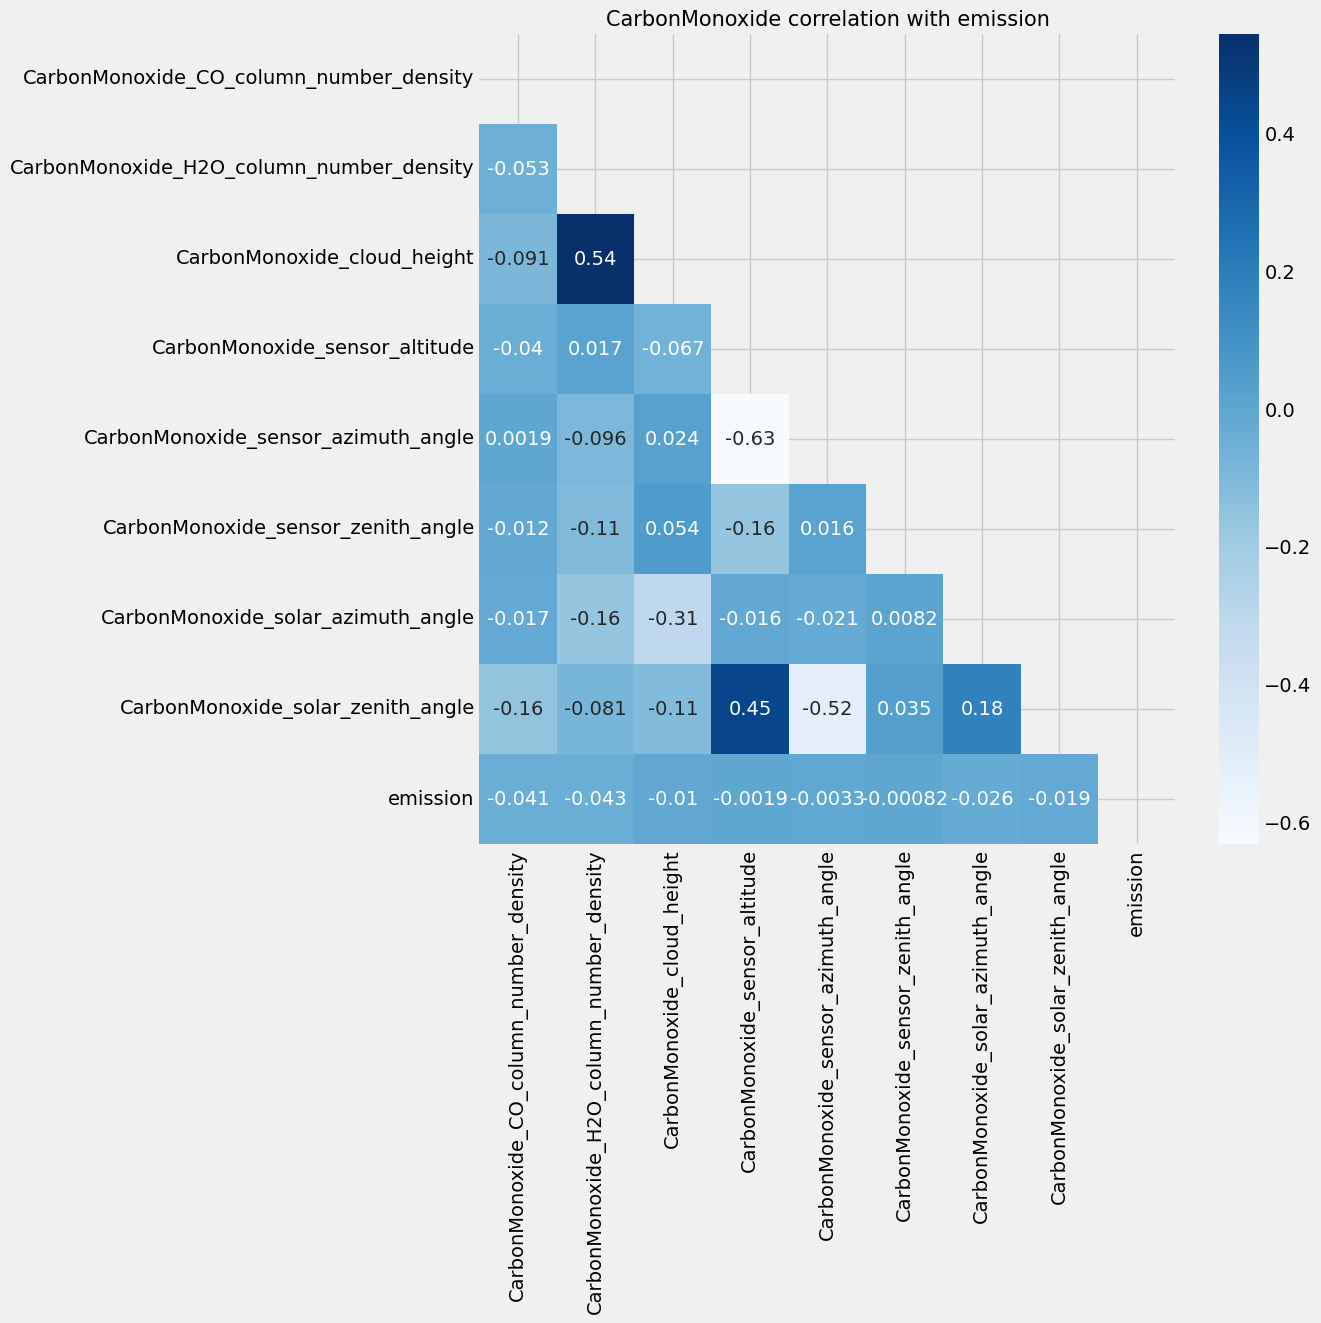

In [7]:
features2 = [ 'CarbonMonoxide_CO_column_number_density',
              'CarbonMonoxide_H2O_column_number_density',
              'CarbonMonoxide_cloud_height',
              'CarbonMonoxide_sensor_altitude',
              'CarbonMonoxide_sensor_azimuth_angle',
              'CarbonMonoxide_sensor_zenith_angle',
              'CarbonMonoxide_solar_azimuth_angle',
              'CarbonMonoxide_solar_zenith_angle',
              'emission']

correlation_view(train, features2, title='CarbonMonoxide correlation with emission')

Тут также нет признаков, коррелирующих с таргетом

In [8]:
features2 = [col for col in features2 if col != 'emission']

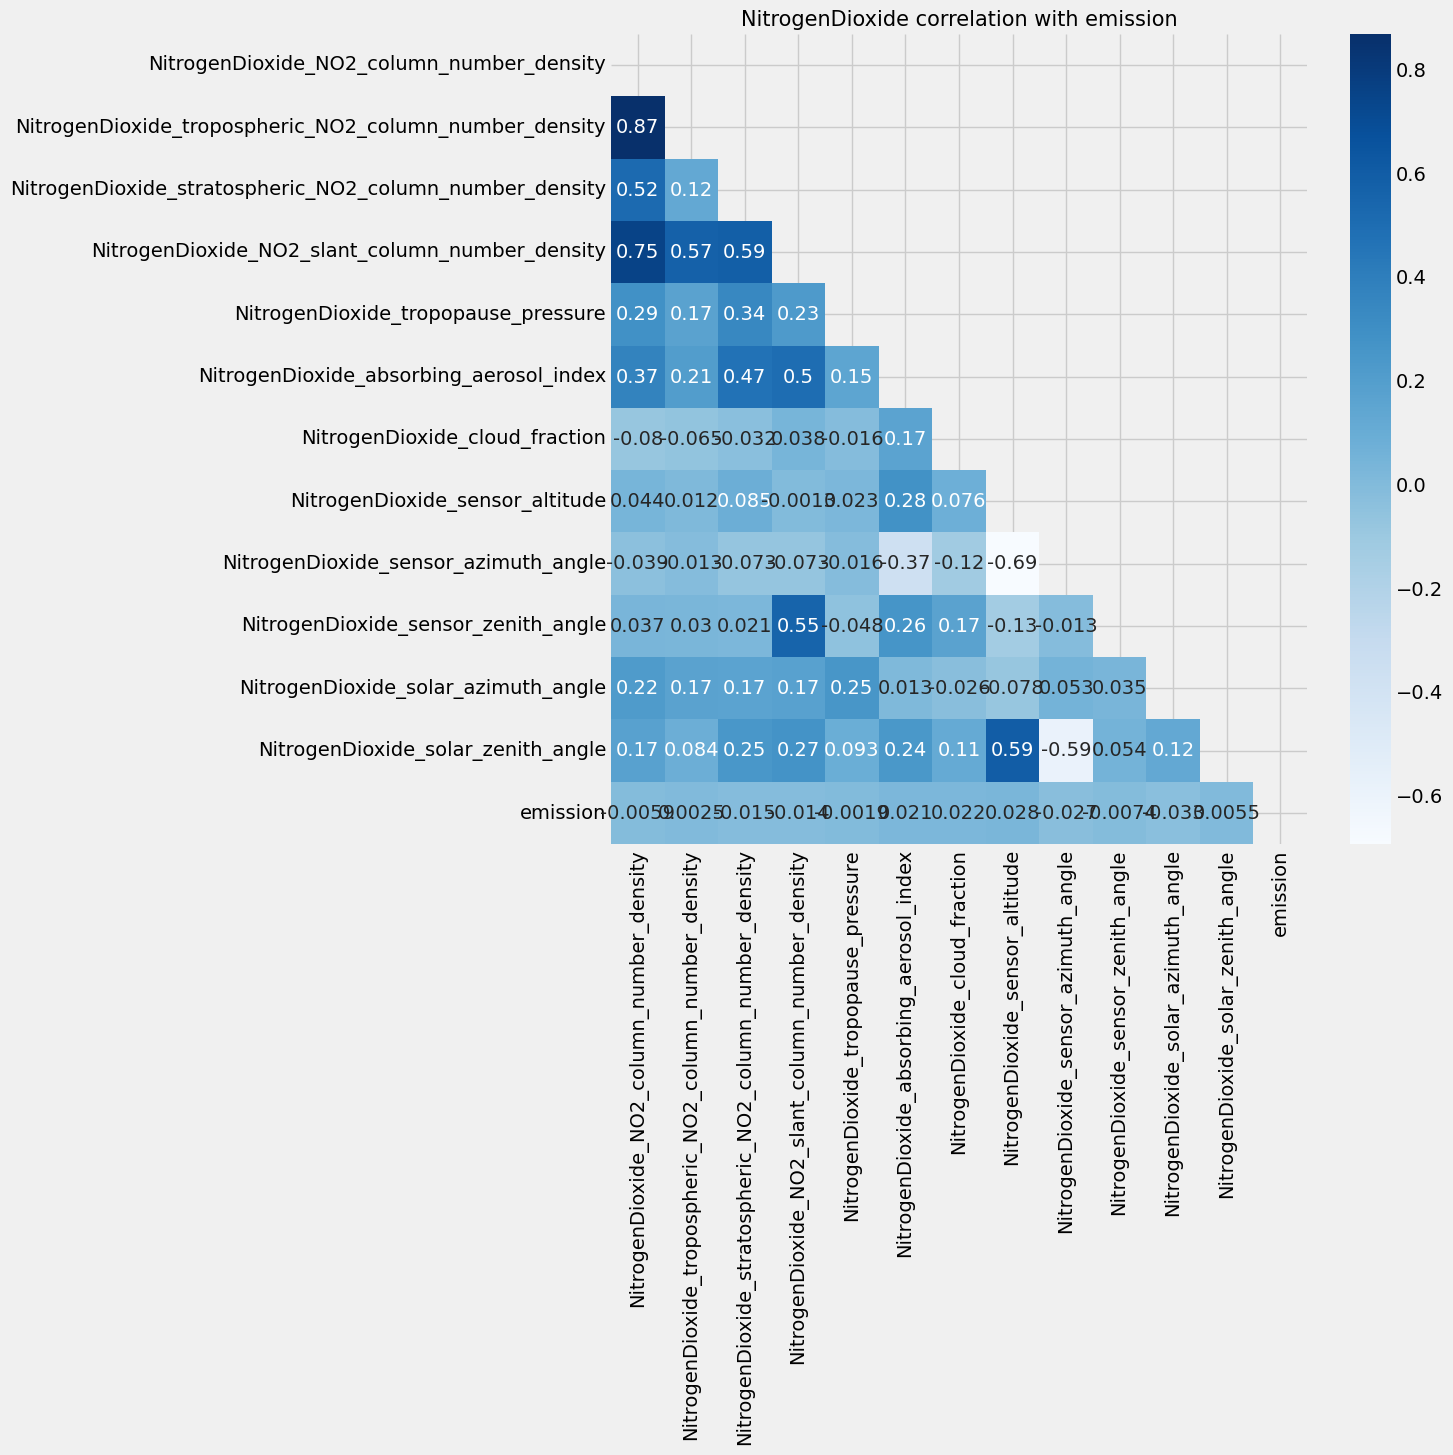

In [9]:
features3 = [ 'NitrogenDioxide_NO2_column_number_density',
              'NitrogenDioxide_tropospheric_NO2_column_number_density',
              'NitrogenDioxide_stratospheric_NO2_column_number_density',
              'NitrogenDioxide_NO2_slant_column_number_density',
              'NitrogenDioxide_tropopause_pressure',
              'NitrogenDioxide_absorbing_aerosol_index',
              'NitrogenDioxide_cloud_fraction',
              'NitrogenDioxide_sensor_altitude',
              'NitrogenDioxide_sensor_azimuth_angle',
              'NitrogenDioxide_sensor_zenith_angle',
              'NitrogenDioxide_solar_azimuth_angle',
              'NitrogenDioxide_solar_zenith_angle',
              'emission']

correlation_view(train, features3, title='NitrogenDioxide correlation with emission')

In [10]:
features3 = [col for col in features3 if col != 'emission']

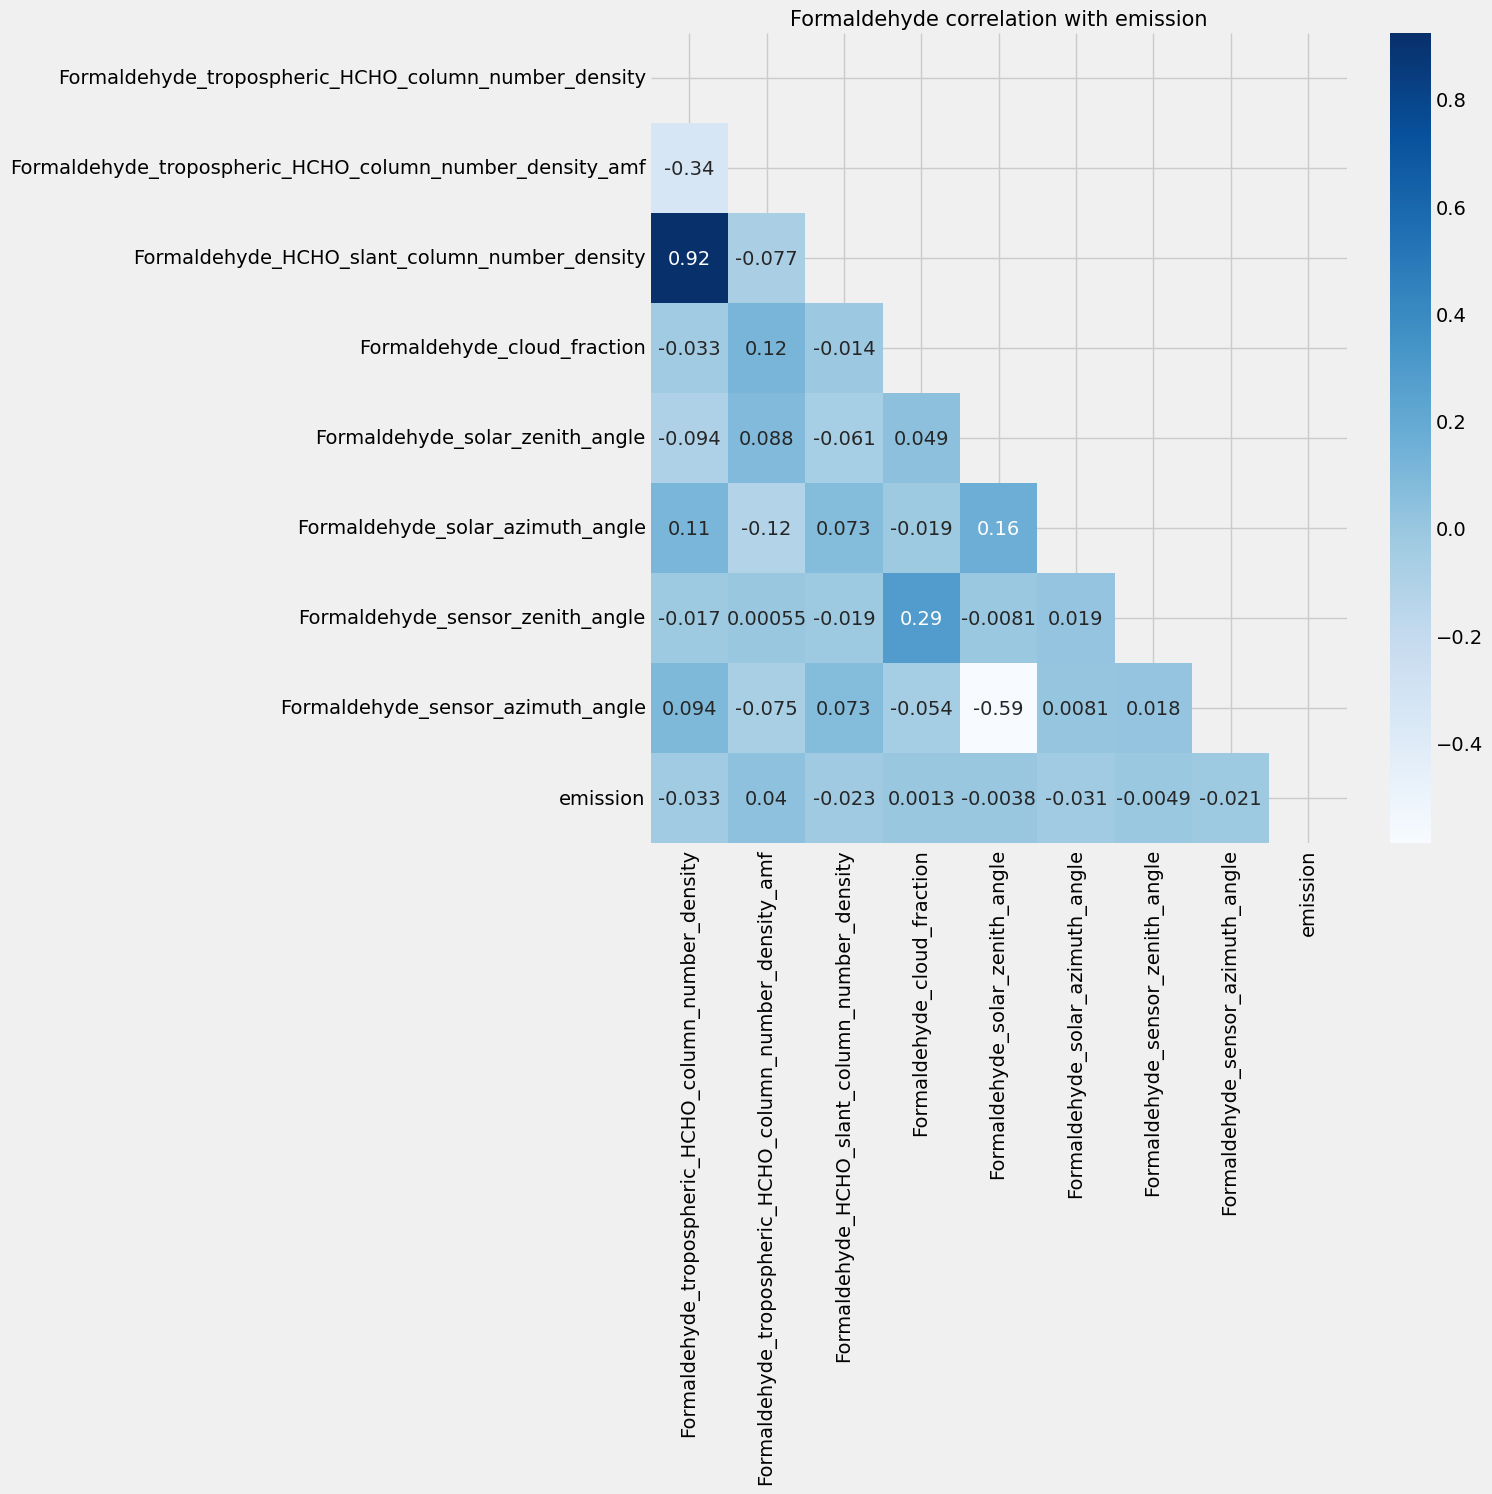

In [11]:
features4 = [ 'Formaldehyde_tropospheric_HCHO_column_number_density',
              'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
              'Formaldehyde_HCHO_slant_column_number_density',
              'Formaldehyde_cloud_fraction',
              'Formaldehyde_solar_zenith_angle',
              'Formaldehyde_solar_azimuth_angle',
              'Formaldehyde_sensor_zenith_angle',
              'Formaldehyde_sensor_azimuth_angle',
              'emission']

correlation_view(train, features4, title='Formaldehyde correlation with emission')

In [12]:
features4 = [col for col in features4 if col != 'emission']

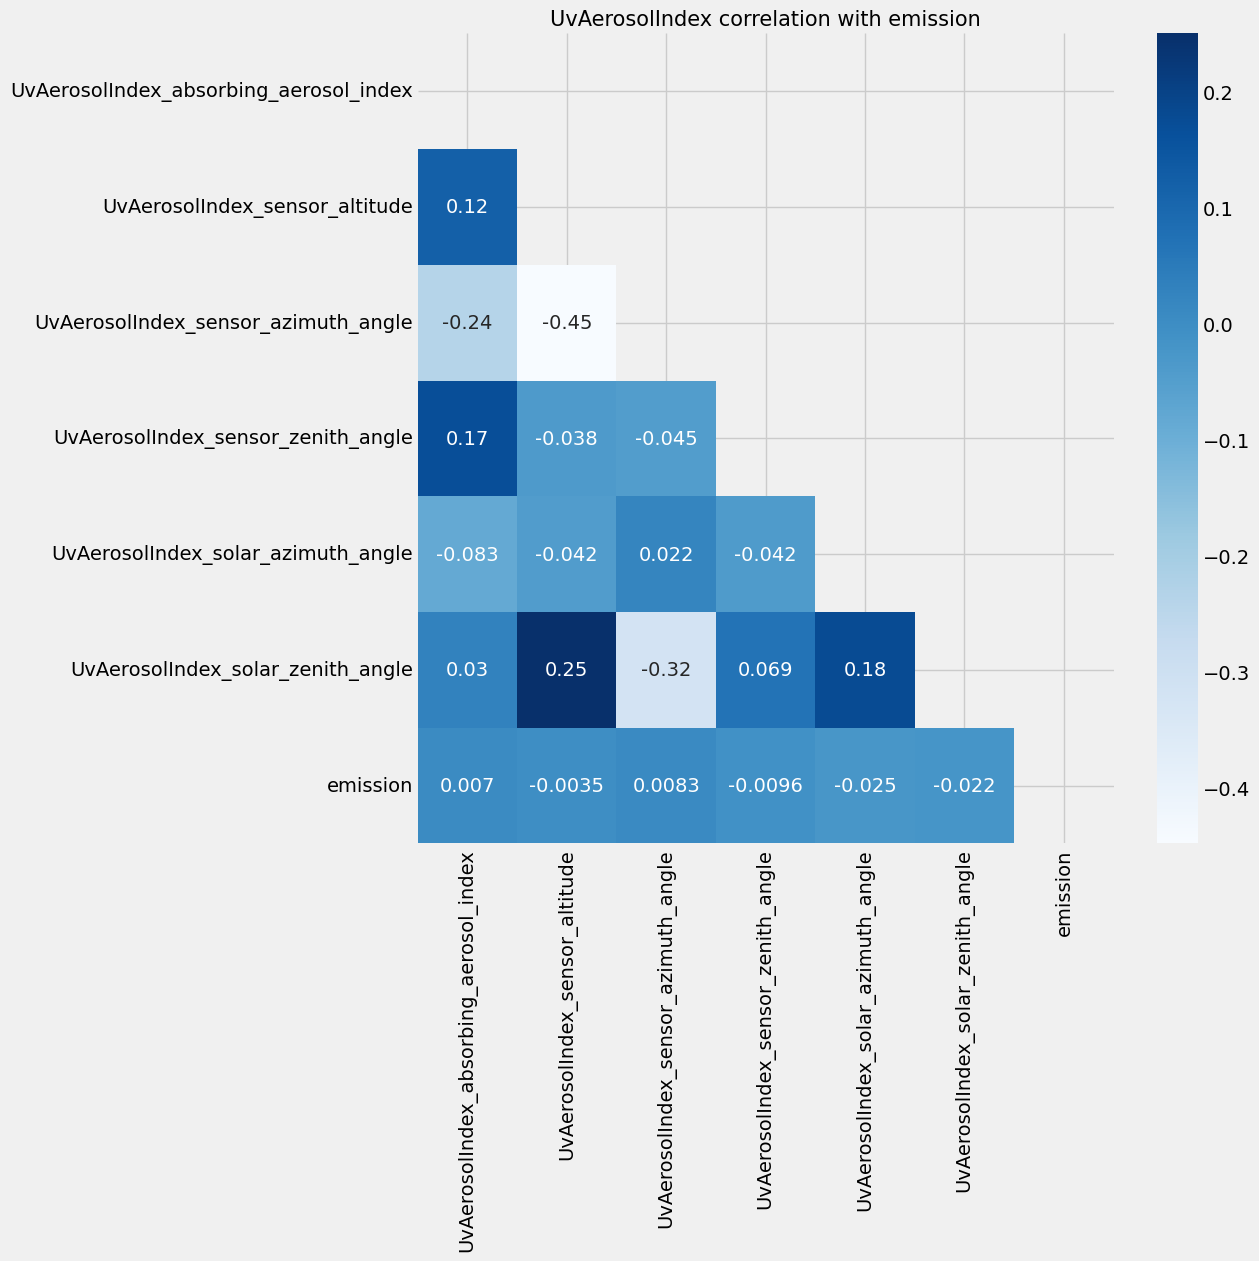

In [13]:
features5 = [ 'UvAerosolIndex_absorbing_aerosol_index',
              'UvAerosolIndex_sensor_altitude',
              'UvAerosolIndex_sensor_azimuth_angle',
              'UvAerosolIndex_sensor_zenith_angle',
              'UvAerosolIndex_solar_azimuth_angle',
              'UvAerosolIndex_solar_zenith_angle',
              'emission']

correlation_view(train, features5, title='UvAerosolIndex correlation with emission')

In [14]:
features5 = [col for col in features5 if col != 'emission']

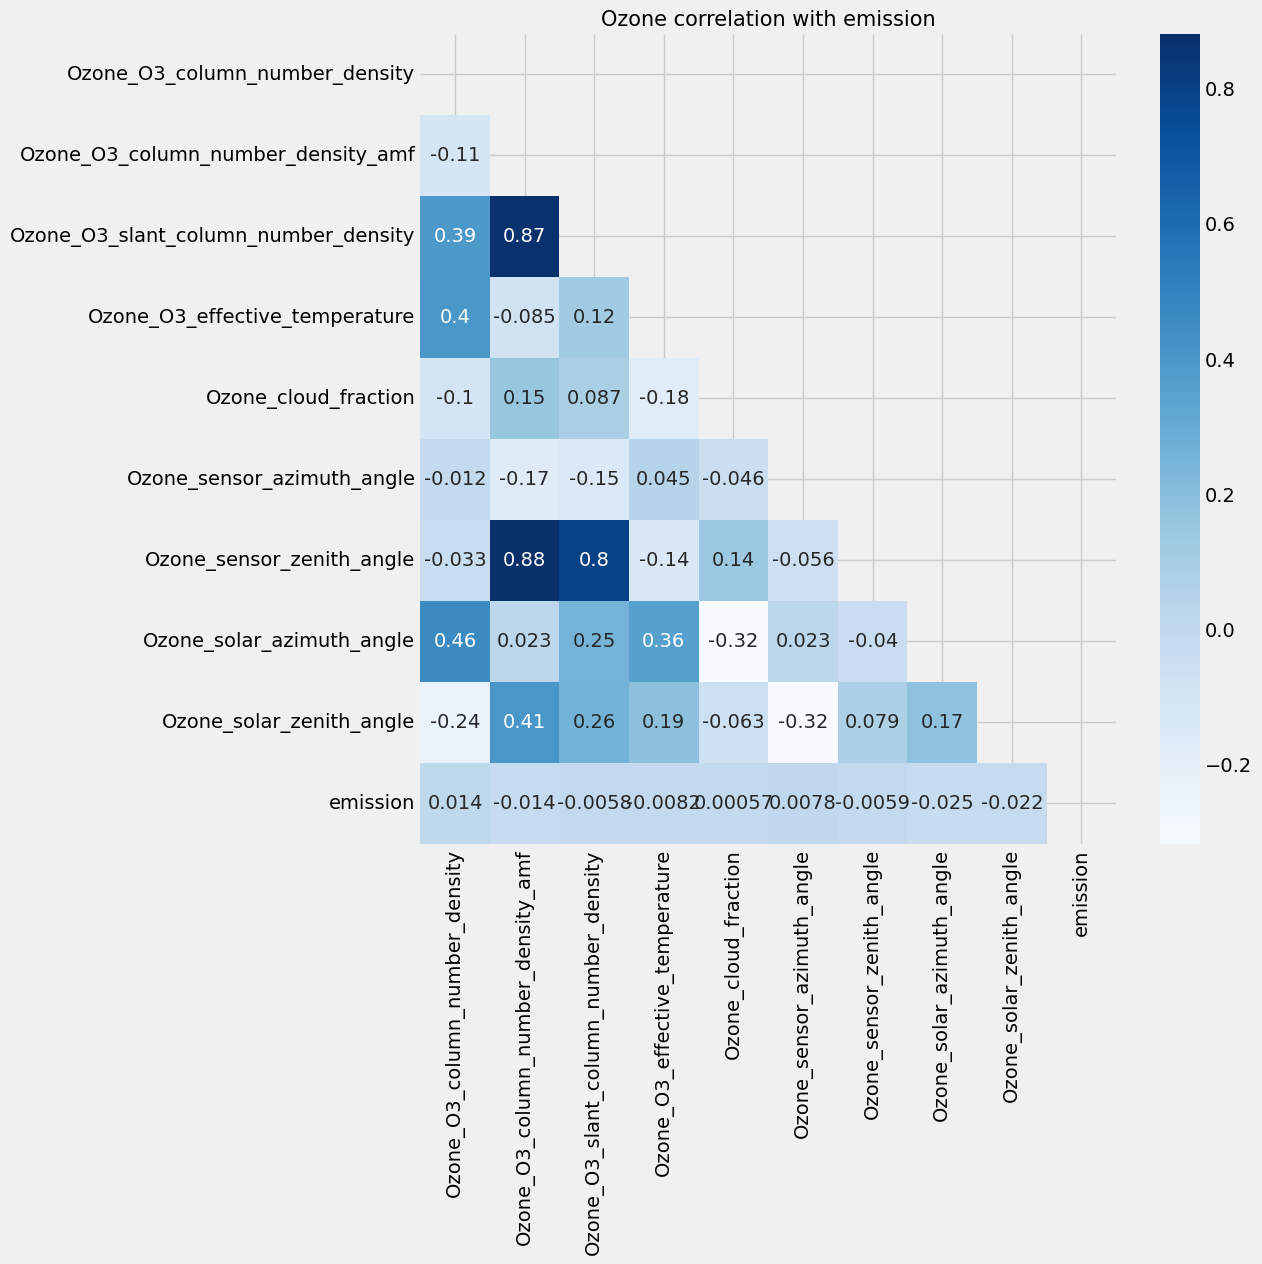

In [15]:
features6 = [ 'Ozone_O3_column_number_density',
              'Ozone_O3_column_number_density_amf',
              'Ozone_O3_slant_column_number_density',
              'Ozone_O3_effective_temperature',
              'Ozone_cloud_fraction',
              'Ozone_sensor_azimuth_angle',
              'Ozone_sensor_zenith_angle',
              'Ozone_solar_azimuth_angle',
              'Ozone_solar_zenith_angle',
              'emission']

correlation_view(train, features6, title='Ozone correlation with emission')

In [16]:
features6 = [col for col in features6 if col != 'emission']

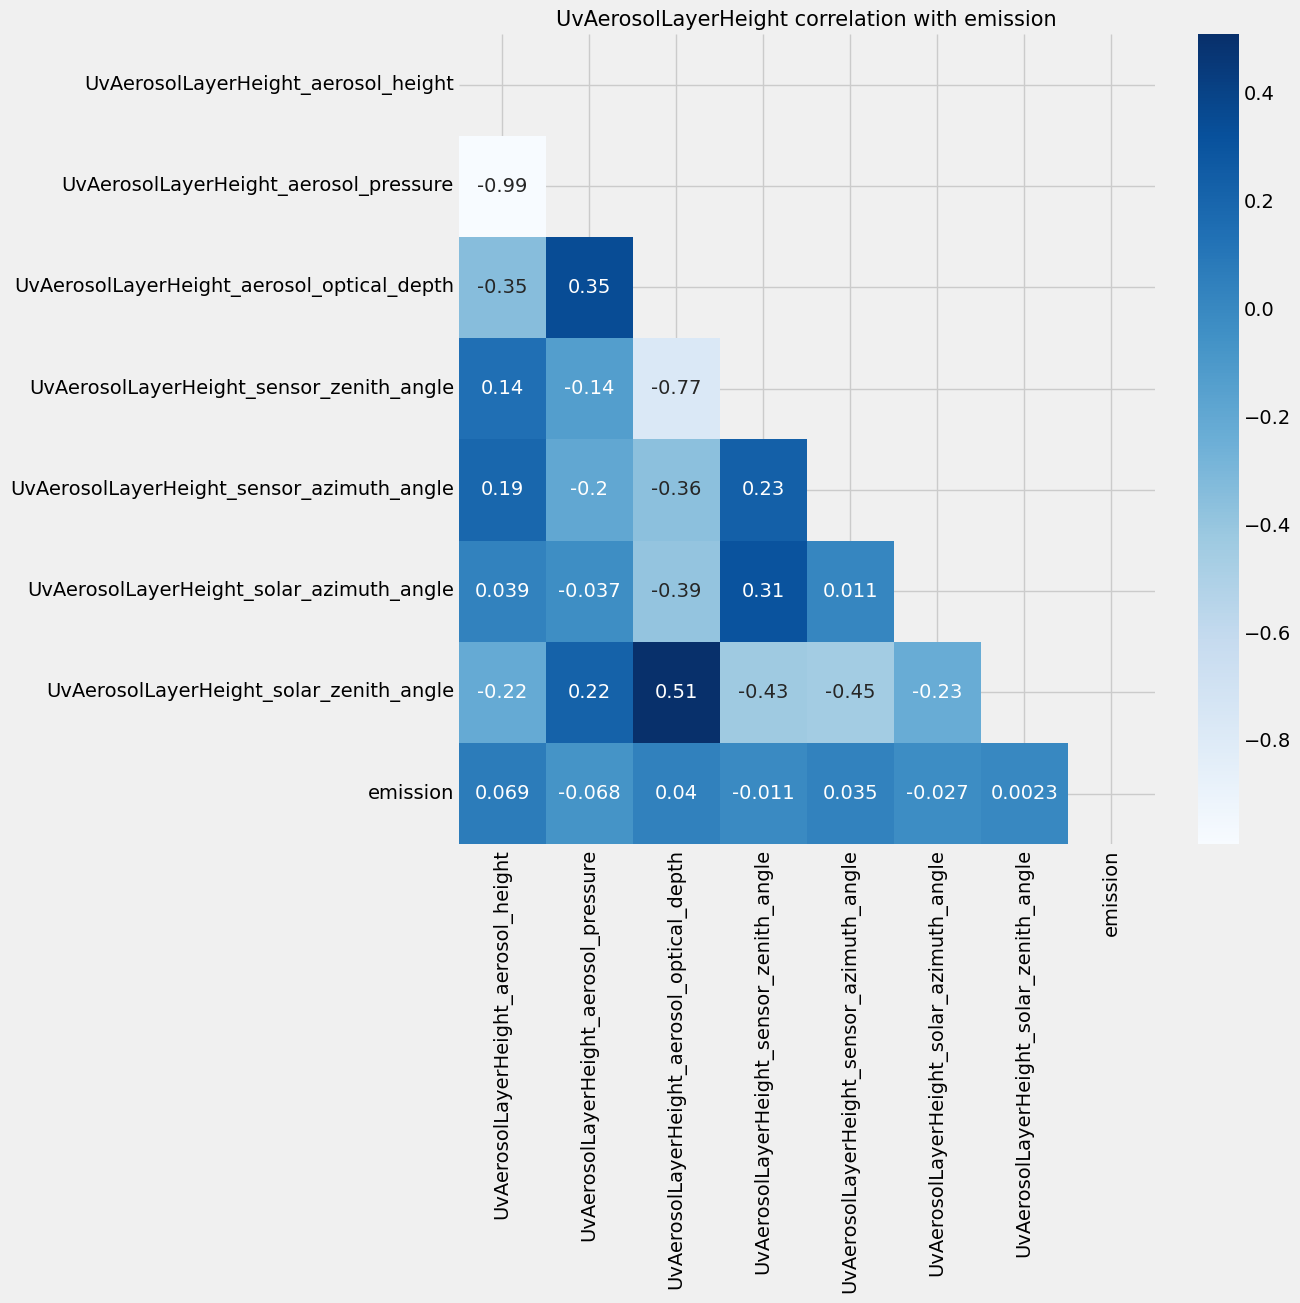

In [17]:
features7 = [ 'UvAerosolLayerHeight_aerosol_height',
              'UvAerosolLayerHeight_aerosol_pressure',
              'UvAerosolLayerHeight_aerosol_optical_depth',
              'UvAerosolLayerHeight_sensor_zenith_angle',
              'UvAerosolLayerHeight_sensor_azimuth_angle',
              'UvAerosolLayerHeight_solar_azimuth_angle',
              'UvAerosolLayerHeight_solar_zenith_angle',
              'emission']

correlation_view(train, features7, title='UvAerosolLayerHeight correlation with emission')

In [18]:
features7 = [col for col in features7 if col != 'emission']

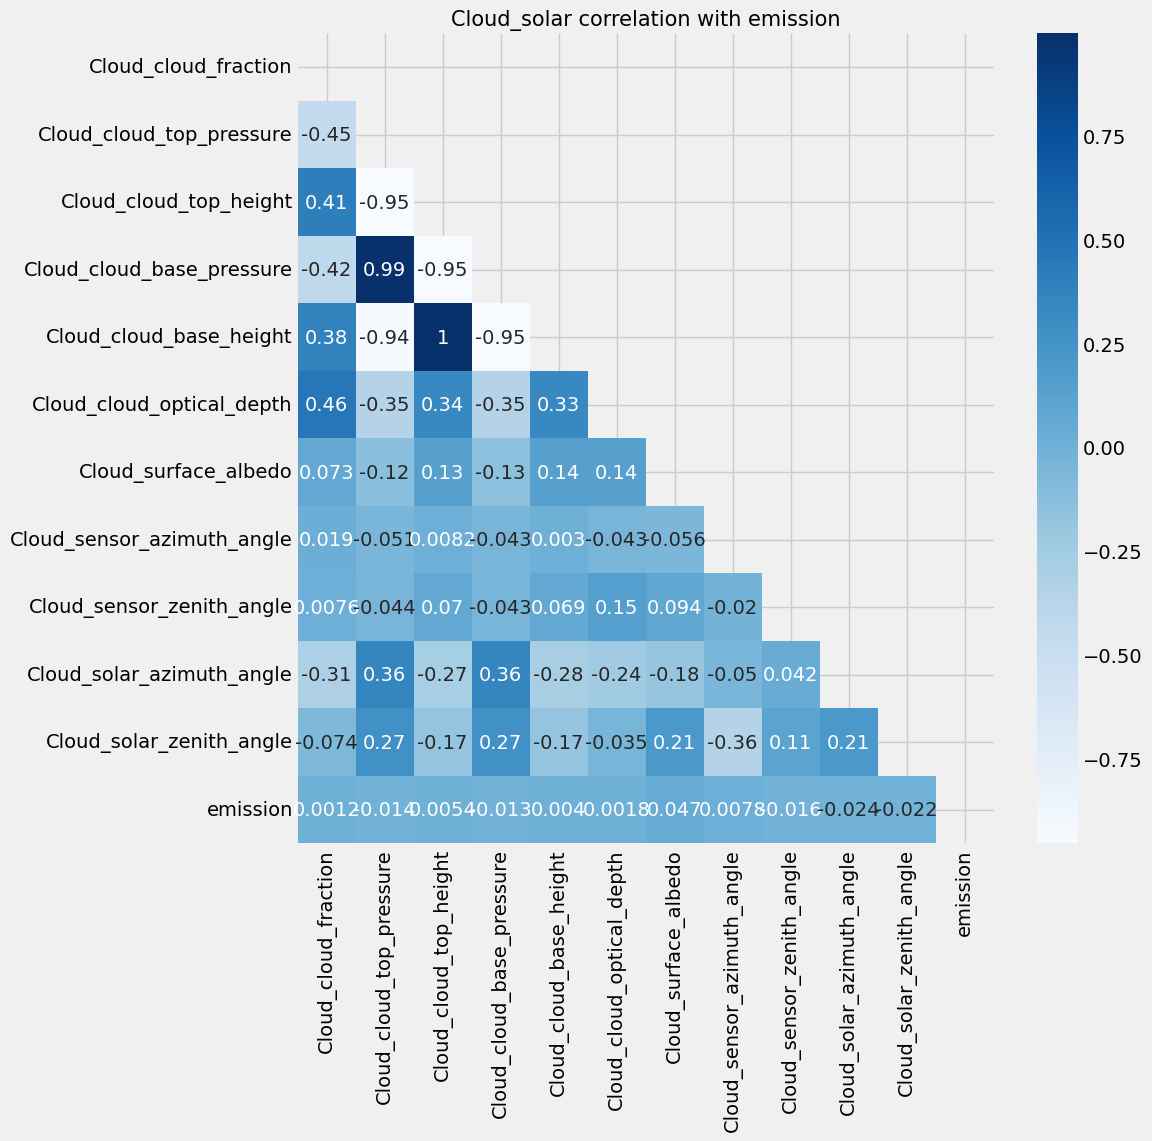

In [19]:
features8 = [ 'Cloud_cloud_fraction',
              'Cloud_cloud_top_pressure',
              'Cloud_cloud_top_height',
              'Cloud_cloud_base_pressure',
              'Cloud_cloud_base_height',
              'Cloud_cloud_optical_depth',
              'Cloud_surface_albedo',
              'Cloud_sensor_azimuth_angle',
              'Cloud_sensor_zenith_angle',
              'Cloud_solar_azimuth_angle',
              'Cloud_solar_zenith_angle',
              'emission']

correlation_view(train, features8, title='Cloud_solar correlation with emission')

In [20]:
features8 = [col for col in features8 if col != 'emission']

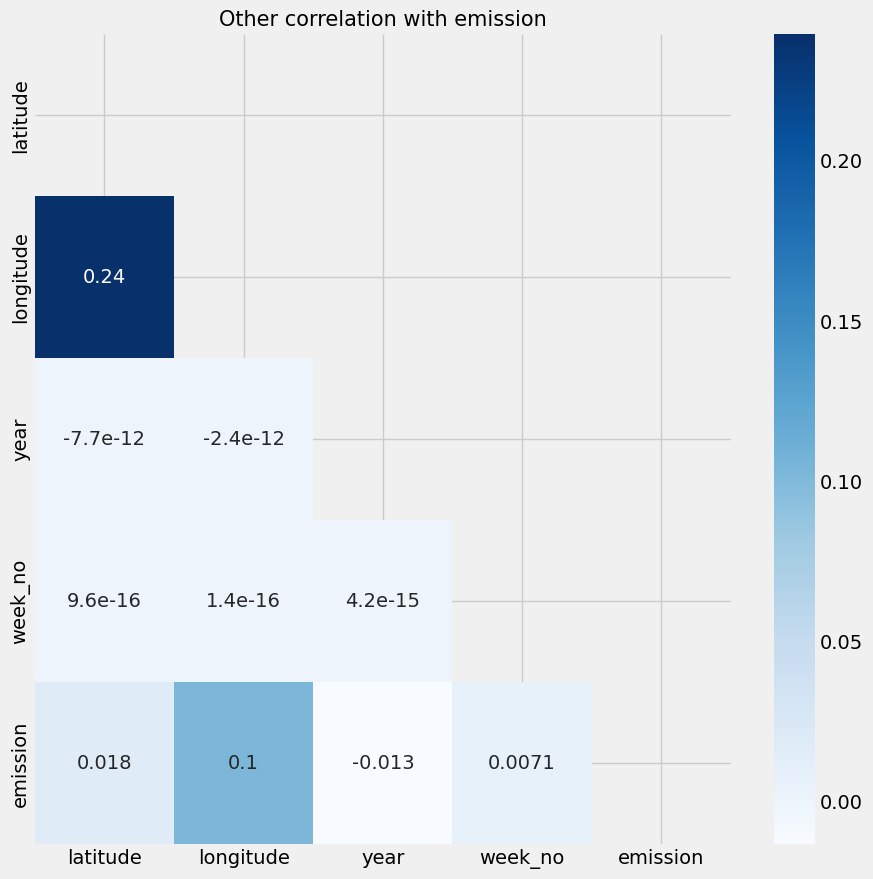

In [21]:
features9 = [ 'ID_LAT_LON_YEAR_WEEK',
              'latitude',
              'longitude',
              'year',
              'week_no',
              'emission']

correlation_view(train, features9, title='Other correlation with emission')

Все данные со спутников практически не скоррелированы с таргетом, учтем также, что среди них есть признаки с пропусками в данных. То есть скорее всего, спутники сообщают нам данные с большим шумом, поэтому лучшей идеей будет убрать все эти признаки

### Drop features

In [22]:
col_to_drop = features1 + features2 + features3 + features4 + features5 + features6 + features7 + features8

In [23]:
train.drop(columns=col_to_drop, inplace=True)
test.drop(columns=col_to_drop, inplace=True)

## Target distribution

In [24]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,4.347317


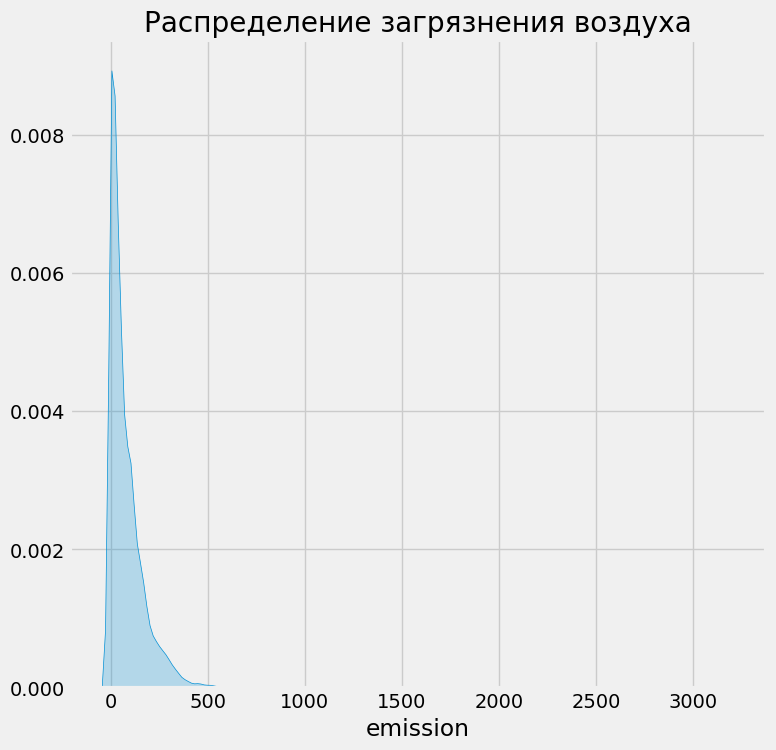

In [ ]:
def target_dist(df, log=None, title=None):
    plt.figure(figsize=(8, 8))

    if log:
        sns.kdeplot(df, x=np.log(df['emission']), fill=True)
        if title:
            plt.title(title)
        else:
            plt.title('Распределение загрязнения воздуха после логарифмирования')

    else:
        sns.kdeplot(df, x='emission', fill=True)
        if title:
            plt.title(title)
        else:
            plt.title('Распределение загрязнения воздуха')

    plt.ylabel('')
    plt.show()


target_dist(train)

Распределение смещено влево. Как вариант, можно прологарифмировать таргет, чтобы распределение было больше похоже на нормальное

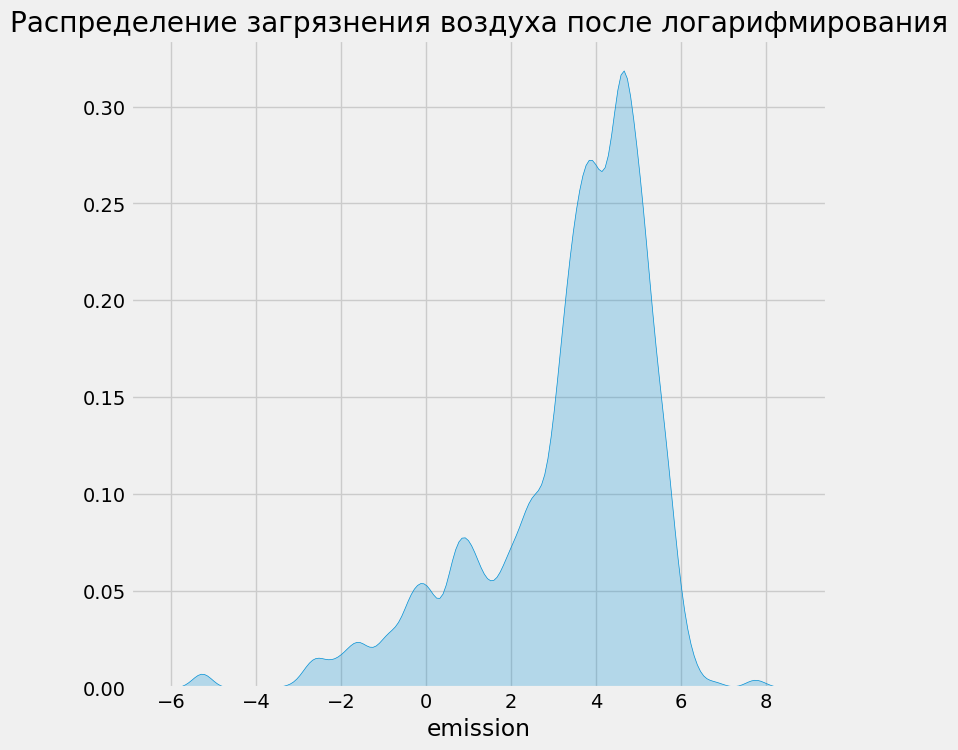

In [ ]:
target_dist(train, log=True)

Рассмотрим кол-во загрязнения по годам

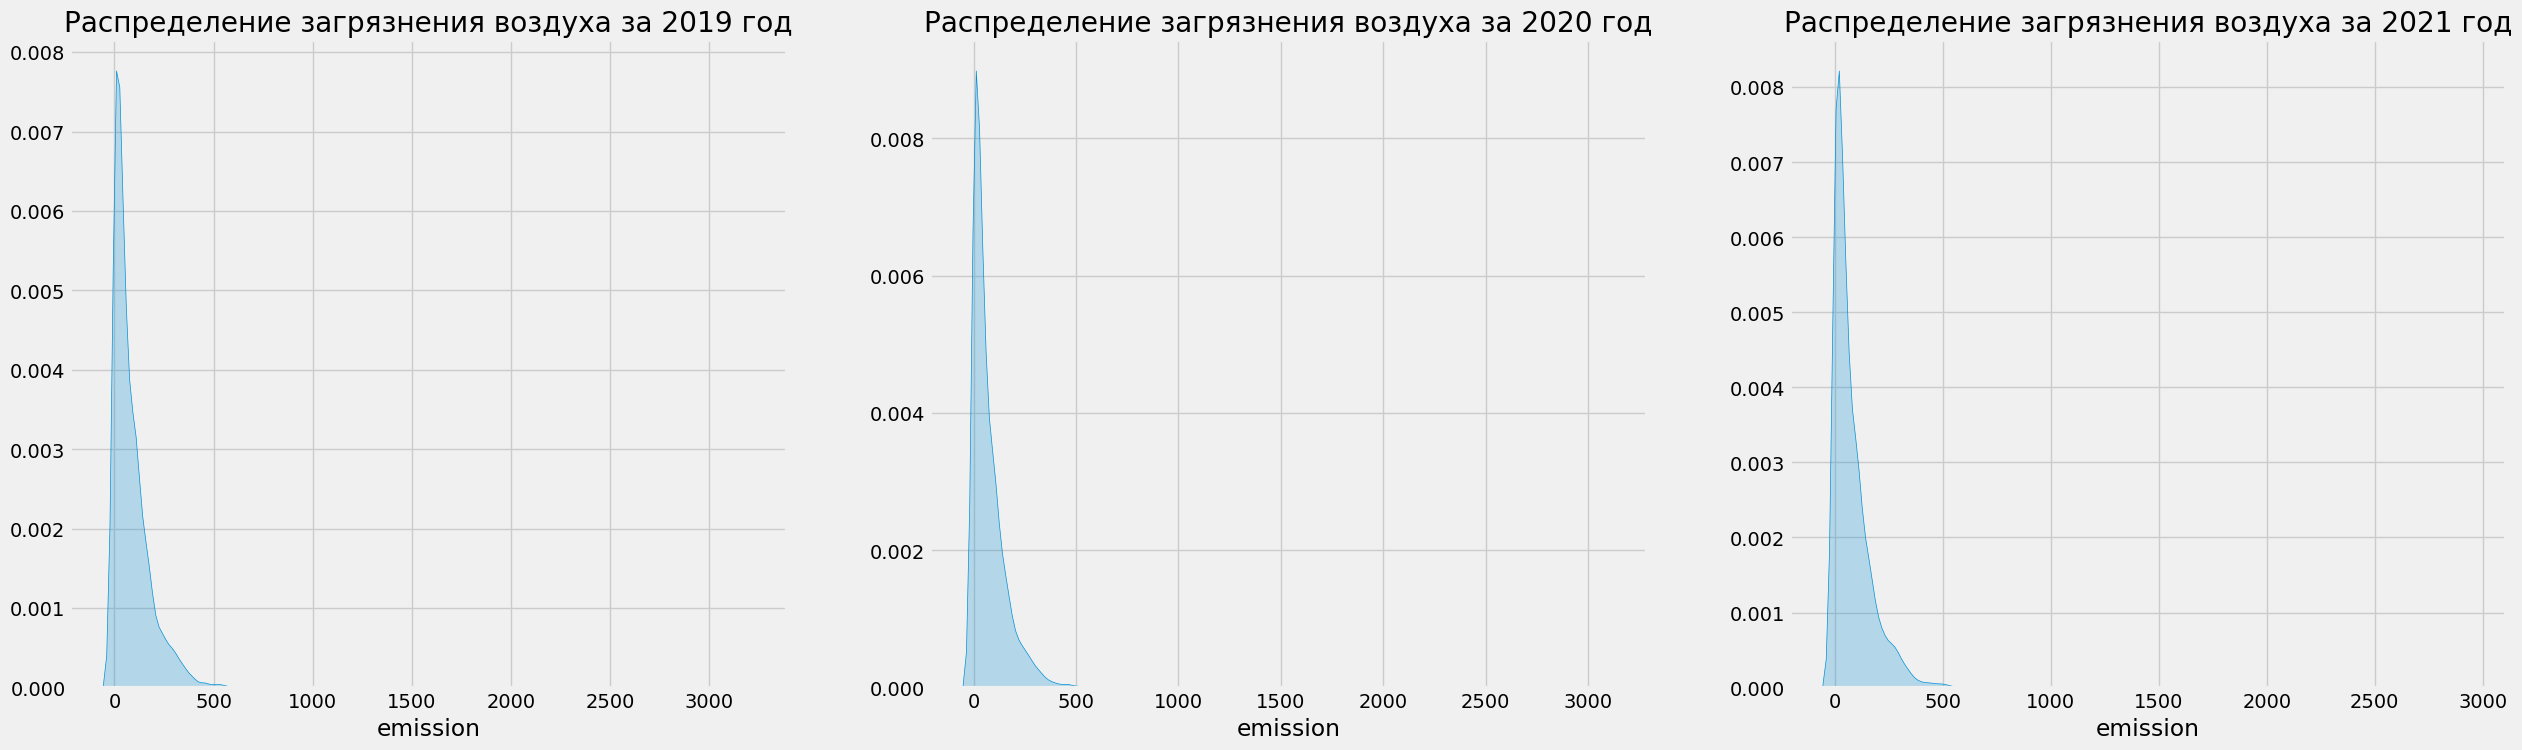

In [ ]:
years = list(train['year'].unique())
fig, ax = plt.subplots(nrows=1, ncols=len(years), figsize=(28, 8))

for i, year in enumerate(years):
    sns.kdeplot(train[train['year']==year], x='emission', fill=True, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(f'Распределение загрязнения воздуха за {year} год')
plt.show()

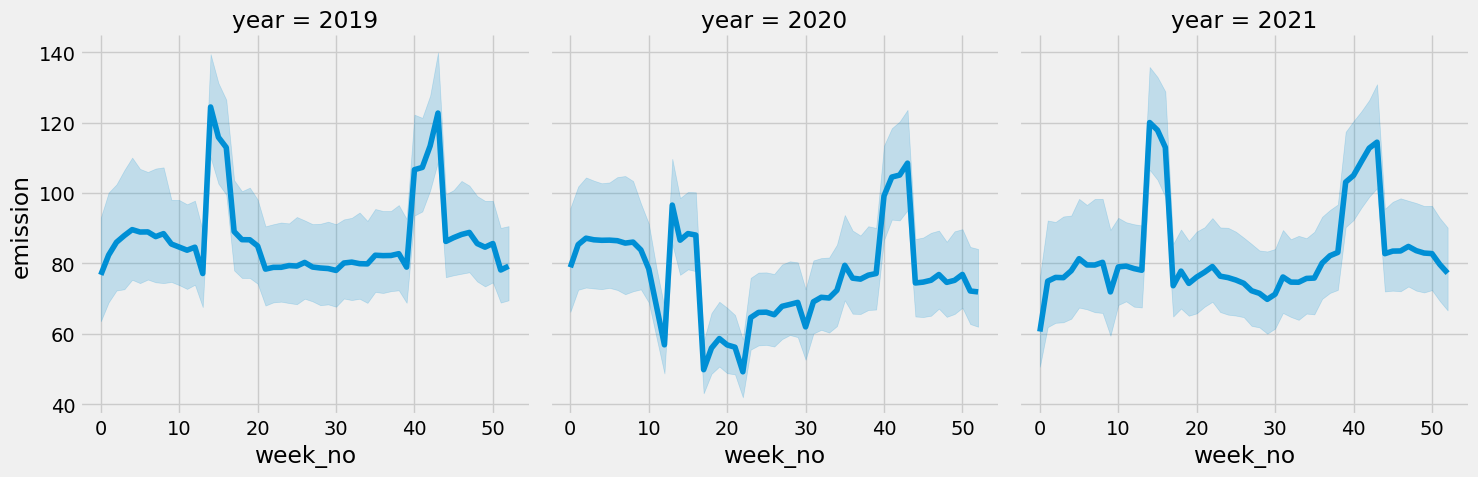

In [ ]:
sns.relplot(data=train, x='week_no', y='emission', col='year', kind='line')
plt.show()

Графики за *2021* и за *2019* году очень похожи. В *2020* есть резкое снижение загрязнения воздуха. Причиной тому служит коронавирус.

Выведем график распределения загрязнения воздуха по отдельным местам в стране

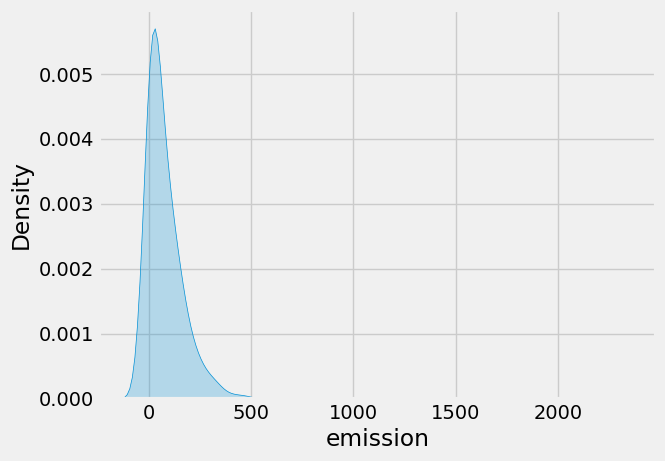

In [ ]:
location_emission = train.groupby(['latitude', 'longitude']).agg({'emission':'mean'}).reset_index()
sns.kdeplot(location_emission, x='emission', fill=True)
plt.show()

Вот это интересно. Есть места, где среднее загрязнение воздуха равно 0

In [ ]:
zero_emission = location_emission[location_emission['emission'] == 0]
zero_emission

,latitude,longitude,emission
38,-2.898,29.002,0.0
43,-2.859,29.041,0.0
52,-2.841,29.159,0.0
62,-2.817,29.283,0.0
118,-2.496,28.504,0.0
224,-1.974,28.526,0.0
264,-1.839,28.761,0.0
266,-1.833,28.467,0.0
283,-1.730,28.470,0.0
286,-1.712,28.688,0.0


Целых 15 мест, где нет загрязнения воздуха или там спутники показывают неверную информацию

In [ ]:
world_map_v2 = folium.Map(location=[location_emission['latitude'].mean(), location_emission['longitude'].mean()]) # зумируем сразу в Руанду

In [ ]:
index_list = list(location_emission.index)

for index in index_list:
    if location_emission.loc[index,'emission'] == 0:
        color='Red'
    else:
        color='Blue'
    folium.CircleMarker(location=[location_emission.loc[index,'latitude'],location_emission.loc[index,'longitude']],
                      radius=np.sqrt(location_emission.loc[index,'emission']),
                      color=color,
                      fill=True,
                      zoom=2).add_to(world_map_v2)
world_map_v2

На юге, а также на западе (окраина страны, где скорее всего никто не проживает) воздух чистее чем внутри страны. Это логично)

## Feature engineering

Добавим недельную сезонность в данные, новогодние каникулы, а также времена года

In [25]:
def feat_eng(df):

    df['holyday'] = df['week_no'].isin([0, 52])
    df['week_sin'] = np.sin(2 * np.pi * df['week_no'] / 53)
    df['week_cos'] = np.cos(2 * np.pi * df['week_no'] / 53)
    df['season'] = df['week_no'].apply(lambda x: 2 if 10 <= x and x < 23
                                            else 3 if 23 <= x and x < 36
                                            else 4 if 36 <= x and x < 48
                                            else 1)
    return df

train = feat_eng(train)
test = feat_eng(test)

In [26]:
train.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace=True)
test.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace=True)

In [27]:
train.head()

,latitude,longitude,year,week_no,emission,holyday,week_sin,week_cos,season
0,-0.51,29.29,2019,0,3.750994,True,0.000000,1.000000,1
1,-0.51,29.29,2019,1,4.025176,False,0.118273,0.992981,1
2,-0.51,29.29,2019,2,4.231381,False,0.234886,0.972023,1
3,-0.51,29.29,2019,3,4.305286,False,0.348202,0.937420,1
4,-0.51,29.29,2019,4,4.347317,False,0.456629,0.889657,1


## Обучение

### Lightgbm

Обучим модель ***lightgmb*** сначала на дефолтных гиперпараметрах, а после подберем гиперпараметры через ***Optuna*** и заново обучим

In [29]:
# light LGBM
from lightgbm import LGBMRegressor as lgb
# Optuna
import optuna

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
# pip install optuna

In [44]:
X = train.drop(columns=['emission'])
y = train['emission']
log_y = np.log1p(train['emission'])

In [38]:
RANDOM_STATE = 42
PARAMS = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 15,
    'max_depth': 3,
    'learning_rate': 0.1,
    'verbosity': -1
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
# X_train, X_test, log_y_train, log_y_test = train_test_split(X, log_y, test_size=0.2, random_state=RANDOM_STATE)

lgb_regr = lgb(
    **PARAMS,
    random_state=RANDOM_STATE
)


In [52]:
lgb_regr.fit(X_train, y_train)
y_pred = lgb_regr.predict(X_test)

In [53]:
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}')

RMSE: 71.35


In [46]:
X_train, X_test, log_y_train, log_y_test = train_test_split(X, log_y, test_size=0.2, random_state=RANDOM_STATE)

In [47]:
lgb_regr.fit(X_train, log_y_train)
log_y_pred = lgb_regr.predict(X_test)
y_pred_v1 = np.expm1(log_y_pred)

print(f'RMSE: {mean_squared_error(y_test, y_pred_v1, squared=False):.2f}')

RMSE: 114.33


Логарифмирование таргета не помогло

Отобразим ***feature_importances*** для нашей модели

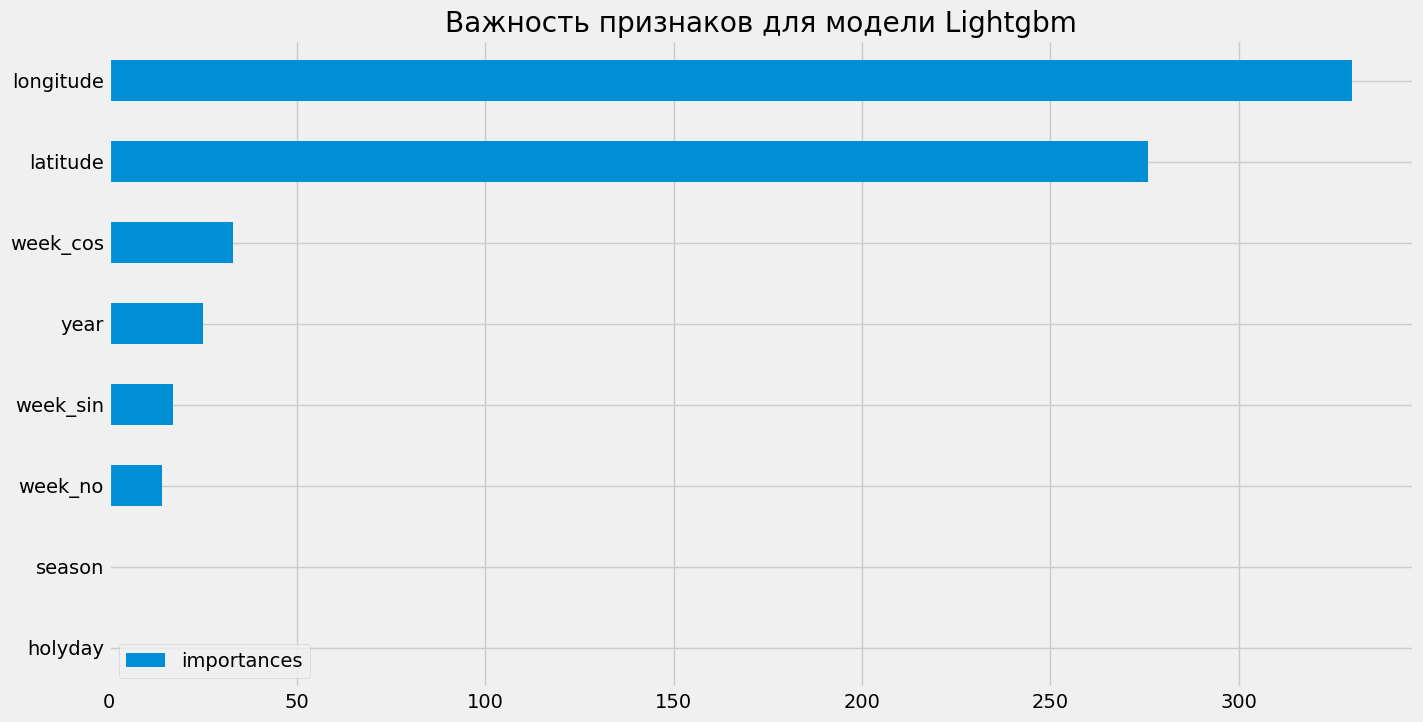

In [54]:
def show_importance(FEATURES:list, feature_importances:np.array):
    feature_importances_df = pd.DataFrame(index=FEATURES,
                       data=feature_importances,
                       columns=['importances'])

    feature_importances_df.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(15, 8),
                                                            title=f'Важность признаков для модели Lightgbm')
    plt.show()
    return

show_importance(FEATURES=list(X.columns),
                feature_importances=lgb_regr.feature_importances_
                )

### Optuna + Lightgbm

In [ ]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "num_iterations": 1000,
        "verbosity": -1,
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0), # бэггинг признаков для обучения (bagging_fraction*100) % признаков
        "bagging_freq": 1, # через столько итераций будет использован бэггинг
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10), # макс. кол-во листьев в дереве
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100), # мин кол-во данных в одном листе
    }

    model = lgb(**params,
                early_stopping_rounds=50,
                random_state=RANDOM_STATE)
    model.fit(X_train, y_train, eval_set = (X_test, y_test))

    y_pred_opt = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred_opt, squared=False)

    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

[I 2023-09-06 21:06:57,584] A new study created in memory with name: no-name-ec5fd3fe-3d97-44e9-b465-3e8017f2ca84


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2023-09-06 21:07:29,036] Trial 0 finished with value: 16.842525415864 and parameters: {'bagging_fraction': 0.9748513917906154, 'learning_rate': 0.02999676562950513, 'num_leaves': 807, 'colsample_bytree': 0.9603923023031778, 'min_data_in_leaf': 91}. Best is trial 0 with value: 16.842525415864.
[I 2023-09-06 21:07:44,787] Trial 1 finished with value: 53.42124788120133 and parameters: {'bagging_fraction': 0.8675088007156184, 'learning_rate': 0.010908550766111906, 'num_leaves': 488, 'colsample_bytree': 0.20195660532506943, 'min_data_in_leaf': 27}. Best is trial 0 with value: 16.842525415864.
[I 2023-09-06 21:07:56,929] Trial 2 finished with value: 66.54862012021562 and parameters: {'bagging_fraction': 0.6287915838111218, 'learning_rate': 0.006342425604091314, 'num_leaves': 126, 'colsample_bytree': 0.28866755628277396, 'min_data_in_leaf': 33}. Best is trial 0 with value: 16.842525415864.
[I 2023-09-06 21:08:14,761] Trial 3 finished with value: 38.6937502489219 and parameters: {'bagging_f

In [ ]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'bagging_fraction': 0.4041483093721251, 'learning_rate': 0.019884949474277054, 'num_leaves': 963, 'colsample_bytree': 0.8595216593706393, 'min_data_in_leaf': 10}
Best RMSE: 14.480174252665375


In [48]:
params = {'bagging_fraction': 0.4041483093721251,
          'learning_rate': 0.019884949474277054,
          'num_leaves': 963,
          'colsample_bytree': 0.8595216593706393,
          'min_data_in_leaf': 10}

lgb_regr_opt = lgb(
    **params,
    random_state=RANDOM_STATE
)


lgb_regr_opt.fit(X_train, y_train)
y_pred_opt = lgb_regr_opt.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.4041483093721251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4041483093721251
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.4041483093721251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4041483093721251
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 63218, number of used features: 8
[LightGBM] [Info] Start training from score 82.392697
[LightGBM] [Warning] min_data_in_leaf is set=10, min_c

In [49]:
print(f'RMSE: {mean_squared_error(y_test, y_pred_opt, squared=False):.2f}')

RMSE: 33.84


Метрика ***RMSE*** упала аж в два раза

Теперь взглянем на важность признаков после подбора гиперпараметров

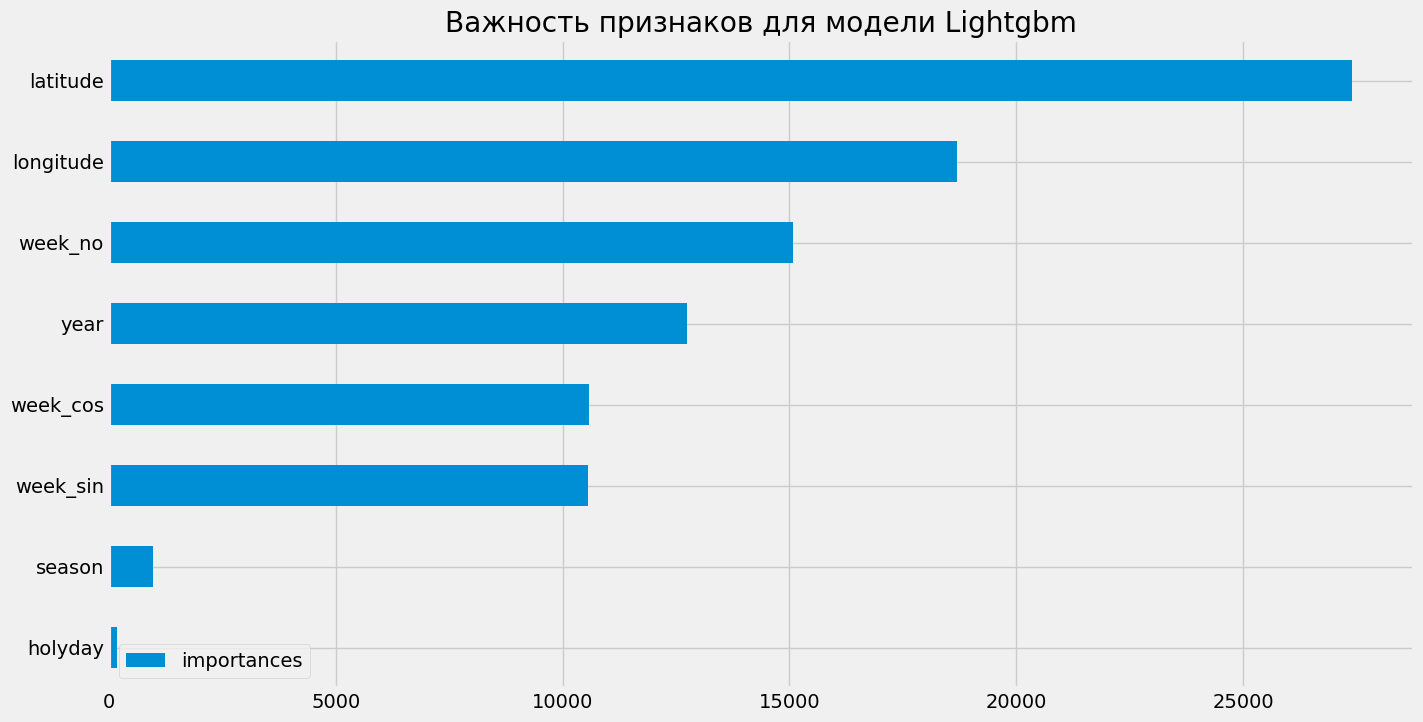

In [55]:
show_importance(FEATURES=list(X.columns),
                feature_importances=lgb_regr_opt.feature_importances_
                )

## Предсказание

In [56]:
test.head()

,latitude,longitude,year,week_no,holyday,week_sin,week_cos,season
0,-0.51,29.29,2022,0,True,0.000000,1.000000,1
1,-0.51,29.29,2022,1,False,0.118273,0.992981,1
2,-0.51,29.29,2022,2,False,0.234886,0.972023,1
3,-0.51,29.29,2022,3,False,0.348202,0.937420,1
4,-0.51,29.29,2022,4,False,0.456629,0.889657,1


In [57]:
preds = lgb_regr_opt.predict(test)
preds

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.4041483093721251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4041483093721251


array([13.98815172, 13.98815172, 13.98815172, ..., 35.90326015,
       35.90326015, 35.90326015])

In [ ]:
lgb_submission = submission.copy()
lgb_submission['emission'] = preds
lgb_submission.to_csv("lgb-subs_v1.csv",index=False)
lgb_submission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,13.988152
1,ID_-0.510_29.290_2022_01,13.988152
2,ID_-0.510_29.290_2022_02,13.988152
3,ID_-0.510_29.290_2022_03,13.988152
4,ID_-0.510_29.290_2022_04,13.988152


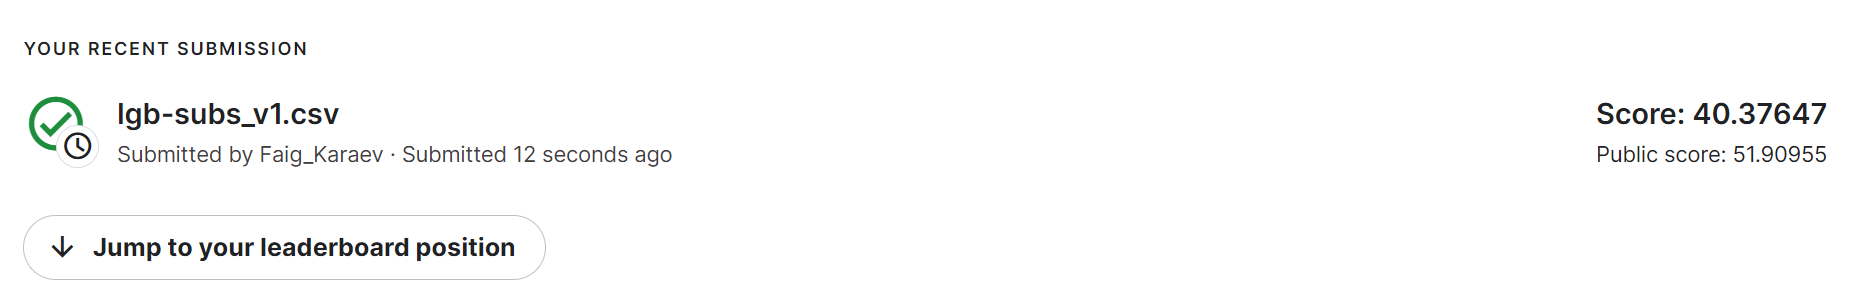

### Отображение ошибок

In [64]:
errors = X_test.copy()
errors['emission'] = y_test
errors['preds'] = y_pred_opt
errors['MSE'] = (errors['preds'] - errors['emission']) ** 2
errors = errors[['latitude', 'longitude', 'year', 'week_no', 'emission', 'preds', 'MSE']]
errors.sort_values(by='MSE', ascending=False)[: 20]

,latitude,longitude,year,week_no,emission,preds,MSE
46702,-2.079,29.321,2021,9,2730.6590,913.473789,3.302162e+06
46590,-2.079,29.321,2019,3,3136.0488,2322.000490,6.626747e+05
56891,-2.378,29.222,2021,22,2399.3726,1660.342483,5.461655e+05
46641,-2.079,29.321,2020,1,2889.7146,2273.446688,3.797861e+05
56890,-2.378,29.222,2021,21,2225.3953,1651.368273,3.295070e+05
56783,-2.378,29.222,2019,20,2282.7380,1722.956790,3.133550e+05
56865,-2.378,29.222,2020,49,2276.7520,1723.478589,3.061115e+05
56784,-2.378,29.222,2019,21,2249.1313,1716.711788,2.834705e+05
56798,-2.378,29.222,2019,35,2397.3904,1869.246614,2.789359e+05
56916,-2.378,29.222,2021,47,2512.3118,2024.040267,2.384091e+05


Есть пару координат, в которых есть совсем грубые ошибки на предсказании.